<a href="https://colab.research.google.com/github/M4rk151050/Huertita/blob/master/CasoB_CounterStrike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para comenzar, importamos las librerías necesarias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el archivo a trabajar que se encuentra de forma local en la computadora.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Anexo Forma B_demo_round_traces.csv to Anexo Forma B_demo_round_traces.csv


Luego de tener el Archivo cargado, lo ingresamos a una variable y creamos un DataFrame para leer el Archivo .csv

In [3]:
url = 'Anexo Forma B_demo_round_traces.csv'
df = pd.read_csv(url, sep=';')

Para probar que se cargó correctamente, Mostraremos las 5 primeras observaciones con la función .head() del DataFrame.

In [ ]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,False,51.120249,0.962309,322909.131476,100831.407375,123.567901,0.0,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,False,43.486626,0.818610,547137.458474,60960.883185,87.839889,0.0,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,False,37.354698,0.703180,0.000000,56422.523836,94.668664,0.0,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,False,47.678861,0.897527,768923.179642,89634.733132,117.785457,0.0,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,False,53.122511,1.000000,202397.446775,108656.497344,128.132662,0.0,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,254527.691176


Vemos que tenemos una característica que nos sirve de nada llamada Unnamed: 0.
Eliminaremos esta característica para limpiar el DataFrame.

In [44]:
del df['Unnamed: 0']

In [ ]:
df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,False,51.120249,0.962309,322909.131476,100831.407375,123.567901,0.0,5.988405e+06,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,501379.183091
1,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,False,43.486626,0.818610,547137.458474,60960.883185,87.839889,0.0,5.415945e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,208807.587297
2,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,False,37.354698,0.703180,0.000000,56422.523836,94.668664,0.0,6.658033e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,381652.027911
3,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,False,47.678861,0.897527,768923.179642,89634.733132,117.785457,0.0,5.364147e+06,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,289754.503091
4,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,False,53.122511,1.000000,202397.446775,108656.497344,128.132662,0.0,4.878228e+06,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,254527.691176


También podemos mostrar las últimas 5 observaciones y ver el total de las mismas.

In [ ]:
df.tail()

,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
79152,de_mirage,CounterTerrorist,2,511,5,76561198024905796,False,False,False,False,34.027207,0.425085,0.000000e+00,40481.778529,46.530780,0.000000,1.370955e+06,1,1,1.0,0.0,0.0,0.0,0,22.775960,0,0,0,0,5600,27100,4,0,2,2,768003.878843
79153,de_mirage,CounterTerrorist,2,511,5,76561198000020858,False,False,False,False,29.261054,0.365544,0.000000e+00,32134.776126,42.960931,109345.366682,1.223142e+06,0,0,1.0,0.0,0.0,0.0,0,28.714119,1,0,1,0,5500,27100,8,5,1,3,692262.605640
79154,de_mirage,CounterTerrorist,2,511,5,76561198013485667,False,False,False,False,59.147178,0.738897,2.279624e+06,60051.689383,39.690475,0.000000,9.462262e+05,1,1,1.0,0.0,0.0,0.0,0,29.768923,0,0,0,0,4950,27100,5,0,2,3,161310.783653
79155,de_mirage,CounterTerrorist,2,511,5,76561197972003061,False,False,False,False,42.582843,0.531967,1.502696e+06,27987.628542,25.700302,0.000000,1.218743e+06,0,2,0.0,1.0,0.0,0.0,0,75.281780,0,0,0,0,4950,27100,1,0,1,0,984575.199373
79156,de_mirage,CounterTerrorist,2,511,5,76561197989744167,False,False,True,False,80.047931,1.000000,1.846960e+06,98677.247087,48.182250,764092.209992,1.082910e+06,2,1,1.0,0.0,0.0,0.0,0,43.872047,4,0,2,0,6100,27100,5,1,1,2,633305.796231


In [ ]:
df.info()

Con la función .Describe vemos varios datos importantes como el total de datos, la media, la desviación estandar, el valor más bajo, los cuartiles 25%, 50% y 75% y el dato con el valor más alto. El Valor del Cuartil 50% también puede ser interpretado como la mediana. 

In [76]:
df.describe()

,InternalTeamId,MatchId,RoundId,SteamId,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,AvgKillDistance,AvgSiteDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
count,79157.000000,79157.000000,79157.000000,7.915700e+04,79157.000000,79157.000000,7.915700e+04,7.915700e+04,79157.000000,7.915700e+04,7.915700e+04,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04
mean,1.500006,250.525033,12.765517,7.656120e+16,72.795720,0.829561,1.122538e+06,1.041888e+05,84.351773,2.880379e+05,2.828657e+06,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,0.221787,58.066821,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484,6.288927e+05
std,0.500003,149.557804,7.432837,3.342137e+07,48.321035,0.210842,1.134700e+06,3.543487e+05,171.890139,6.036307e+05,1.528175e+06,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,0.415451,32.424435,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752,3.402574e+05
min,1.000000,4.000000,1.000000,7.656120e+16,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,128.000000,6.000000,7.656120e+16,47.080072,0.698892,2.578825e+05,5.898255e+04,56.202641,0.000000e+00,1.508095e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.273243,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000,4.097790e+05
50%,2.000000,236.000000,12.000000,7.656120e+16,69.239615,0.922777,7.409804e+05,8.601557e+04,83.617316,0.000000e+00,2.699214e+06,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,54.774193,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000,5.542432e+05
75%,2.000000,373.000000,19.000000,7.656120e+16,92.647813,1.000000,1.753172e+06,1.213966e+05,104.131144,3.603394e+05,3.728018e+06,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,79.065900,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000,7.524568e+05
max,2.000000,511.000000,36.000000,7.656120e+16,2990.560394,2.000000,2.202346e+07,3.964645e+07,24111.819781,1.104564e+07,1.203440e+07,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,545.034851,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000,5.170168e+06


Con la función Value_counts() contamos los valores unicos del Dataframe, ordenados de mayor a menor y así obtenemos la moda

In [ ]:
df['RoundKills'].value_counts()

A continuación obtenemos la Varianza, la cual nos mostrará la dispersión de los datos.

In [58]:
df['RoundKills'].var()

0.7775677545186217

Generamos la matriz de correlación con la función corr(), la cuál nos permitirá determinar la relación de las características.

In [ ]:
df.corr()

Para representar gráficamente la matriz anterior, creamos un gráfico de figura la cual permite ver con colores la correlación de las características.

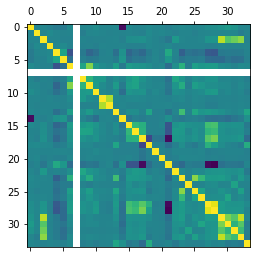

In [77]:
plt.matshow(df.corr())

Al ser muchos datos de correlación, procedemos a filtrar con una condición. Ya que queremos ver solo los datos que presentan un correlación directa y con pendiente positiva. Para esto filtramos a solo los valores mayores a 0.6

In [ ]:
correlacion_mat = df.corr()

correlacion_pares = correlacion_mat.unstack()

pares_ordenados = correlacion_pares.sort_values(kind="quicksort")

pares_positivos = pares_ordenados[pares_ordenados > 0.6]

print(pares_positivos)

En el siguiente histograma, vemos la característica 'RoundKills'. El cual lo realizamos con 5 intervalos o bins. El histograma nos muestra la cantidad Kills por rondas.

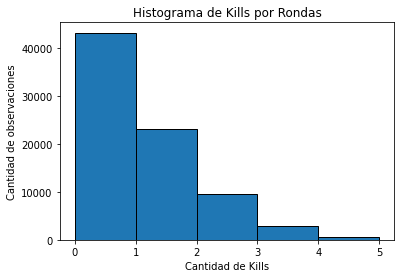

In [82]:
x = df['RoundKills']

num_bins = 5

plt.hist(x, num_bins,edgecolor='black')

plt.xlabel('Cantidad de Kills')
plt.ylabel('Cantidad de observaciones')
plt.title('Histograma de Kills por Rondas')

plt.show()

EL siguiente diagrama de Caja nos muestra los cuartiles, los valores atipicos, la media y los valores maximos y minimos.

In [ ]:
plt.boxplot(list(df['RoundKills']))
plt.show()

Para realizar un diagrama de dispersión, calculamos la varianza, la covarianza  y la media de las características que utilizaremos.

In [66]:
df['MatchHeadshots'].var()

10.541395917206147

In [67]:
df['MatchHeadshots'].std()

3.2467515946259495

In [68]:
df['MatchKills'].var()

38.379006500173716

In [69]:
df['MatchKills'].std()

6.195079216618115

In [84]:
df['MatchKills'].mean()

8.511578255871243

In [85]:
df['MatchHeadshots'].mean()

3.85848377275541

Con los datos obtenidos, realizamos el diagrama de dispersión e interpretamos el gráfico.

Text(0, 0.5, 'Tiros a la cabeza por Partida')

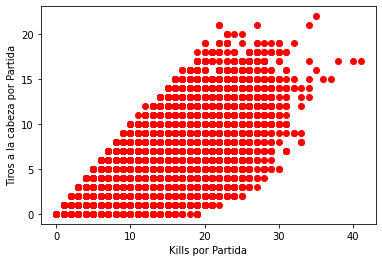

In [83]:
plt.plot(df['MatchKills'],df['MatchHeadshots'], 'ro')
plt.xlabel('Kills por Partida')
plt.ylabel('Tiros a la cabeza por Partida')